In [75]:
import pandas as pd

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [77]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [79]:
from sklearn.model_selection import train_test_split

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
ppd = pd.read_csv("/Users/ashtynhaynes/Desktop/Stat426Python/BARproject/finaldata126.csv")

In [84]:
#ppd = ppd.drop("created_utc", axis = 1)
#ppd = ppd.drop("d_", axis = 1)

In [127]:
ppd[ppd.url == "https://www.reddit.com/r/Postpartum_Depression/comments/mhn7cm/ppd_or_ppa/"]

,author,selftext,subreddit,title,url,created,date,hash
1320,tidderthrow69,We had our little one a month ago . Initial couple of weeks was fine . We have my wife’s parents...,Postpartum_Depression,PPD or PPA,https://www.reddit.com/r/Postpartum_Depression/comments/mhn7cm/ppd_or_ppa/,1.617275e+09,2021-04-01 04:05:44,1.509884e+19


In [128]:
data = ppd

In [129]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [130]:
data
#data = data.drop_duplicates()


,author,selftext,subreddit,title,url,created,date,hash
1252,Justasmoltowngurl,After a traumatic delivery I knew something was wrong but I wasn't sure what. I didn't feel bond...,Postpartum_Depression,Giving hope with my story,https://www.reddit.com/r/Postpartum_Depression/comments/n20vjn/giving_hope_with_my_story/,1.619835e+09,2021-04-30 19:01:43,5.817813e+18
1253,pocahontas_331,"Hi everyone, my name is Jess and I love in Arkansas. I have a now almost 7 month month old (5 mo...",Postpartum_Depression,Looking to treat my ppd through telegraphy,https://www.reddit.com/r/Postpartum_Depression/comments/n1rhz3/looking_to_treat_my_ppd_through_t...,1.619806e+09,2021-04-30 11:04:57,7.758526e+18
1254,IntelligentChard1873,I am 22 years old and a mother three young boys. I had my youngest son five months ago and since...,Postpartum_Depression,I am struggling,https://www.reddit.com/r/Postpartum_Depression/comments/n1jz1o/i_am_struggling/,1.619774e+09,2021-04-30 02:06:01,1.327200e+19
1255,Purple-Associate5695,I’m a 30yo female. I’ve had weakness and fatigue since about 2 months after I had my first baby....,Postpartum_Depression,Fatigue?,https://www.reddit.com/r/Postpartum_Depression/comments/n16f1d/fatigue/,1.619734e+09,2021-04-29 15:07:41,8.985776e+16
1256,Miserable_Bug_16,"Ok, there, I said it. I hate my mother-in-law. we've been moving for about a week now and we hav...",Postpartum_Depression,I hate my mother-in-law,https://www.reddit.com/r/Postpartum_Depression/comments/n13hzp/i_hate_my_motherinlaw/,1.619725e+09,2021-04-29 12:42:46,3.305805e+17
...,...,...,...,...,...,...,...,...
2416,teresaistired,Just a stupid question related to this sub.\n\nI have lots of lingering trauma issues relating t...,Postpartum_Depression,Do I really belong here?,https://www.reddit.com/r/Postpartum_Depression/comments/nmk2ib/do_i_really_belong_here/,1.622182e+09,2021-05-27 23:03:43,1.408077e+19
2417,SomethingLikeThat74,I hadn’t noticed that I had triggers until recently. Please share yours! And also how you cope.,Postpartum_Depression,What are your triggers for PPD?,https://www.reddit.com/r/Postpartum_Depression/comments/nmba06/what_are_your_triggers_for_ppd/,1.622158e+09,2021-05-27 16:27:17,1.028625e+19
2418,soft_warm_purry,"With my PPD I get triggered easily by whining and crying when it’s at higher frequencies, and I ...",Postpartum_Depression,Ear plugs helping immensely with triggers,https://www.reddit.com/r/Postpartum_Depression/comments/nm4g7e/ear_plugs_helping_immensely_with_...,1.622137e+09,2021-05-27 10:30:24,8.501163e+18
2419,wizard_mundungus,I’m a mom of two boys 5 and 3 years old. I have constant feelings of not being connected to my 5...,Postpartum_Depression,Feels like it’s never going to get better,https://www.reddit.com/r/Postpartum_Depression/comments/nnde4a/feels_like_its_never_going_to_get...,1.622280e+09,2021-05-29 02:21:01,9.977671e+18


In [131]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
#ps = nltk.PorterStemmer()

#data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
#data.columns = ['label', 'body_text']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashtynhaynes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:

#import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
 
# single word lemmatization examples
#list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling',
#         'driving', 'died', 'tried', 'feet']
#for words in list1:
#    print(words + " ---> " + wnl.lemmatize(words))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashtynhaynes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [133]:
#import nltk

In [134]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['selftext'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(1045, 8605)
['', '0', '000', '0000', '01', '03', '0730', '1', '10', '100', '1000', '100lbs', '100making', '100mg', '100pm', '101', '1010', '1011', '1012', '1012pm', '1020', '104', '105', '10hrs', '10ish', '10lb', '10lbs', '10mg', '10mins', '10mth', '10pm', '10pm4am', '10th', '10times', '10x', '11', '111130am', '1130', '1130am', '1130pm12am', '115', '11mo', '11pm', '12', '120', '120lb', '121215pm', '125mg', '12m', '12th', '12w', '13', '130', '13lbs', '13m', '13month', '13wks', '14', '1400', '1416', '14m', '15', '1520', '15m', '15mins', '15monthold', '15x', '16', '16days', '16f', '17', '1722', '17th', '18', '180', '18009444773', '1821', '1839', '18ish', '18mo', '19', '1961', '199', '19th', '1am', '1f', '1hp', '1pm', '1pm1am', '1st', '1yo', '1½', '2', '20', '200', '2000', '200s', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2020i', '2021', '208lbs', '20lbs', '20mg', '21', '2121', '2130', '21f', '22', '220pm', '22f', '22hrs', '23', '230', '2300', '23f', '23rd',

In [136]:
words = count_vect.get_feature_names()

In [137]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df


,,0,000,0000,01,03,0730,1,10,100,...,zap,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#write data to csv
import csv
X_counts_df.to_csv('data.csv')

In [140]:
#X_counts_df[X_counts_df.author == https://www.reddit.com/r/Postpartum_Depression/comments/mhn7cm/ppd_or_ppa/]

In [141]:
sums = X_counts_df.sum(axis = 0, skipna = True)
summed = pd.DataFrame(sums).reset_index()
summed.columns = ['word', 'count']
summed['count'] = pd.to_numeric(summed['count'])

summed.sort_values(['count'],ascending=False, inplace=True)


summed[200:220]

summed.loc[summed['word'] == 'hate']

# words to use: ugly, fat, worthless, shame, unhealty, skinny, body, 
# mirror, cheat, sexy, silly, big, scar, stretch, chubby, healthy

,word,count
3608,hate,239


In [54]:
summed.loc[summed['word'] == 'baby']

,word,count
882,baby,1349


In [55]:
sumnew = summed.loc[summed['count'] >= 100]
#newwords = sumnew['word']
sumnew['word']

3013       feel
4514       like
882        baby
3935         im
3363        get
         ...   
3069       fine
2542        due
5147       next
1892    couldnt
781       asked
Name: word, Length: 226, dtype: object

In [56]:
summed

,word,count
3013,feel,1858
4514,like,1586
882,baby,1349
3935,im,1205
3363,get,1174
...,...,...
3933,illogical,1
3931,illegible,1
3922,ignorance,1
3921,ifyou,1


In [57]:
#data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data['selftext'])
#print(X_counts_sample.shape)
#print(count_vect_sample.get_feature_names())

In [58]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

,,0,000,0000,01,03,0730,1,10,100,...,zap,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#get rid of duplicates
#add another month


In [61]:
# Combine words counts with post details
data = data.reset_index()
X_counts_df = X_counts_df.reset_index()
result = pd.concat([data, X_counts_df], axis=1, join='inner')
#result

In [69]:
#If the post mentions fat, ugly, or body + hate, then the post is marked as person w/ body image issues. 
result['body_image'] = np.where((result['fat'] >=1) | (result['ugly'] >=1) |
                                ((result['hate'] >=1) & (result['body'] >=1)) |
                                (result['worthless'] >=1) | (result['skinny'] >=1) |
                                (result['chubby'] >=1) | (result['mirror'] >=1) |
                                (result['cheat'] >=1) | (result['eat'] >=1) |
                                (result['scar'] >=1) |
                                (result['shame'] >=1) | 
                                (result['clothes'] >=1) | 
                                (result['fit'] >=1), "yes", 'no')


In [70]:
result['body_image'].value_counts()
#result

no     868
yes    177
Name: body_image, dtype: int64

In [71]:
data["author"].value_counts()


[deleted]            21
Miserable_Bug_16     17
Cmomma2020            9
0yuria0               9
notsotoothless        7
                     ..
Amerella              1
Aggravating_Light     1
MissMeganOhara11      1
meganohara22          1
Holly426              1
Name: author, Length: 800, dtype: int64

In [74]:
import csv
result.to_csv('data.csv')

In [98]:
clean_result = result.drop(["index","subreddit","title","url","created","date","hash"], axis = 1)

In [145]:
#split data in to x and y
y = (clean_result['body_image'] == 'yes').astype(int)
text = X_counts_df.values.astype('U')

In [148]:
#make train and test
X_train, X_test, y_train, y_test = train_test_split(text,y, random_state=713, test_size=.4)

,,0,000,0000,01,03,0730,1,10,100,...,zap,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_hat = nb.predict(X_test)
y_hat[0:3]
y_prob = nb.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
# macro average of precision
np.round((.88+.98)/2,2)
# weighted average of precision
np.round(((.88*224)+(.98*1448))/1672,2)
nb_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresh = roc_curve(y_test, y_prob)

/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       352
           1       0.65      0.30      0.41        66

    accuracy                           0.86       418
   macro avg       0.76      0.64      0.67       418
weighted avg       0.84      0.86      0.84       418



/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


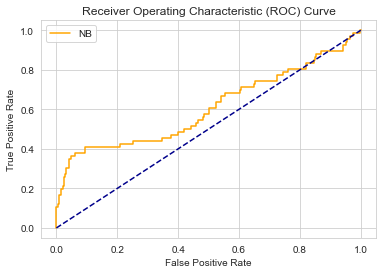

In [150]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [151]:
nb_auc

0.6070506198347106

In [152]:
lr = LogisticRegression(solver='liblinear', C=1)
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
y_hat[0:3]
y_prob = lr.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
lr_auc = roc_auc_score(y_test, y_prob)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, y_prob)

/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/ashtynhaynes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       352
           1       0.67      0.36      0.47        66

    accuracy                           0.87       418
   macro avg       0.78      0.66      0.70       418
weighted avg       0.85      0.87      0.85       418



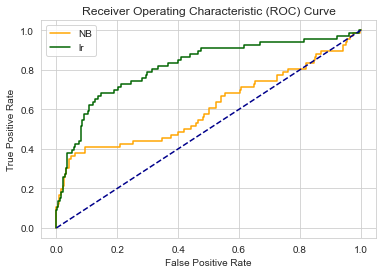

In [153]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [154]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat[0:3]
y_prob = clf.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
clf_auc = roc_auc_score(y_test, y_prob)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       352
           1       0.95      0.95      0.95        66

    accuracy                           0.99       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.99      0.99      0.99       418



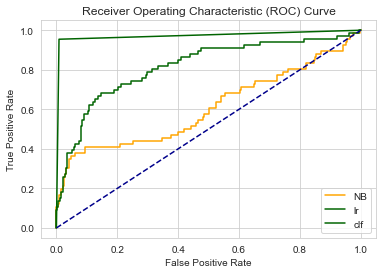

In [155]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot(fpr_clf, tpr_clf, color='darkgreen',label='clf')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [156]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
y_hat[0:3]
y_prob = rf.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
rf_auc = roc_auc_score(y_test, y_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       352
           1       0.75      0.14      0.23        66

    accuracy                           0.86       418
   macro avg       0.80      0.56      0.58       418
weighted avg       0.84      0.86      0.81       418



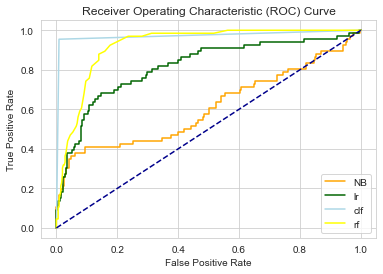

In [157]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot(fpr_clf, tpr_clf, color='lightblue',label='clf')
plt.plot(fpr_rf, tpr_rf, color='yellow',label='rf')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [158]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_hat = gb.predict(X_test)
y_hat[0:3]
y_prob = gb.predict_proba(X_test)[:,1]
y_prob
confusion_matrix(y_test, y_hat)
metrics.accuracy_score(y_test, y_hat)
metrics.precision_score(y_test, y_hat)
metrics.recall_score(y_test, y_hat)
print(metrics.classification_report(y_test, y_hat))
gb_auc = roc_auc_score(y_test, y_prob)
fpr_gb, tpr_gb, thresh_gb = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       352
           1       1.00      0.92      0.96        66

    accuracy                           0.99       418
   macro avg       0.99      0.96      0.98       418
weighted avg       0.99      0.99      0.99       418



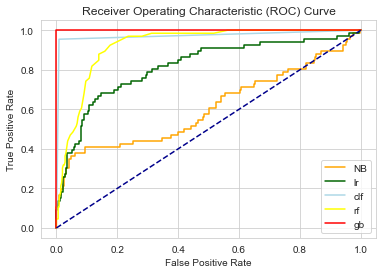

In [159]:
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='darkgreen',label='lr')
plt.plot(fpr_clf, tpr_clf, color='lightblue',label='clf')
plt.plot(fpr_rf, tpr_rf, color='yellow',label='rf')
plt.plot(fpr_gb, tpr_gb, color='red',label='gb')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [163]:
#auc
print(nb_auc)
print(rf_auc)
print(clf_auc)
print(gb_auc)
print(lr_auc)

0.6070506198347106
0.9242424242424243
0.9730113636363636
1.0
0.8153409090909092


Index(['', '0', '000', '0000', '01', '03', '0730', '1', '10', '100',
       ...
       'zap', 'zero', 'zip', 'zippered', 'zippering', 'zoloft', 'zombie',
       'zone', 'zoom', 'zulresso'],
      dtype='object', length=8605)

In [175]:
def important_features(vectorizer,classifier,n=20):
    class_labels = classifier.classes_
    feature_names =X_counts_df.columns

    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]

    print("Important words in neutral posts")

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("-----------------------------------------")
    print("Important words in negative body image posts")

    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)

In [176]:
important_features(cv, nb)



#count_vect_sample = CountVectorizer(analyzer=clean_text)
#X_counts_sample = count_vect_sample.fit_transform(data['selftext'])




Important words in neutral posts
0 727.0 feel
0 595.0 like
0 553.0 baby
0 454.0 get
0 435.0 im
0 408.0 know
0 401.0 time
0 393.0 want
0 364.0 day
0 322.0 month
0 279.0 help
0 253.0 week
0 233.0 husband
0 227.0 really
0 227.0 even
0 219.0 thing
0 219.0 go
0 216.0 would
0 213.0 one
0 212.0 going
-----------------------------------------
Important words in negative body image posts
1 348.0 feel
1 323.0 like
1 258.0 im
1 251.0 time
1 236.0 baby
1 223.0 get
1 209.0 want
1 188.0 know
1 186.0 day
1 155.0 even
1 144.0 would
1 131.0 go
1 121.0 dont
1 116.0 one
1 116.0 husband
1 115.0 month
1 112.0 make
1 112.0 cry
1 111.0 could
1 108.0 help


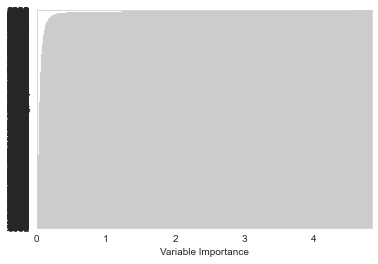

In [177]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}) #index=X_train.columns)
Importance = Importance.iloc[rf.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None